In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_9092\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [7]:
m10_v10_L4_s2=torch.tensor([[[100.0000,  97.6271,  79.7457,  62.6459,  41.3333,  21.0526,  14.0625,
            0.0000,   1.5528,  87.9900],
         [ 99.9687,  94.9257,  83.5106,  72.9560,  38.4306,  44.4444,  18.7500,
            0.0000,   2.8070,  90.6700],
         [ 99.6254,  91.5055,  78.3967,  60.0000,  37.3188,  17.3913,  12.5000,
            0.0000,   5.6075,  92.7400],
         [ 99.5420,  92.8876,  79.6791,  60.6061,  41.9643,   0.0000,   0.0000,
            0.0000,   0.0000,  97.1200],
         [ 99.7753,  93.1694,  75.8824,  57.8947,  36.1111,   0.0000,   0.0000,
            0.0000,  15.0000,  98.3600],
         [ 99.8132,  91.9811,  65.4321,  57.1429,  34.0426,  20.0000,   0.0000,
            0.0000,   0.0000,  98.8800],
         [ 99.8780,  89.1089,  60.4651,  50.0000,  60.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.5200],
         [ 99.8688,  93.5484,  61.9048,  50.0000,  40.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.6800],
         [ 99.8492,  76.9231,  66.6667, 100.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.7100],
         [ 99.9800,  92.8571,  75.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.9600]],

        [[ 83.6864,  84.2916,  72.3534,  60.8355,  47.0397,  37.2881,  26.4120,
           19.4030,   9.3808,  42.5400],
         [ 99.5595,  90.3020,  78.6026,  59.8452,  40.2809,  27.3392,  21.7573,
           12.2807,   7.6056,  62.0400],
         [ 97.1333,  86.9789,  70.7658,  55.6561,  38.2266,  21.4646,  16.1538,
            5.1948,   8.7838,  70.8700],
         [ 97.2050,  83.9595,  62.8989,  44.7706,  40.8163,  20.1058,  14.2857,
            5.0000,  16.4835,  78.3900],
         [ 99.1339,  91.2723,  72.2611,  51.8072,  41.1215,  29.4737,  10.4167,
            8.3333,   4.9383,  90.4400],
         [ 99.4284,  91.3118,  68.5499,  49.7006,  35.4430,  23.9130,  21.7391,
            0.0000,   0.0000,  94.1900],
         [ 99.6817,  91.3043,  71.7533,  61.7647,  28.3333,  16.6667,   0.0000,
            0.0000,  12.5000,  97.2400],
         [ 99.8187,  89.8345,  69.5652,  71.4286,  25.9259,  16.6667,   0.0000,
            0.0000,   0.0000,  98.6200],
         [ 99.8547,  89.4118,  73.4177,  70.0000,  31.2500,   0.0000,  50.0000,
            0.0000,   0.0000,  99.2300],
         [ 99.9083,  88.6364,  75.6098,  62.5000,  75.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.6200]],

        [[  0.0000,   0.0000,  70.0000,  66.6667,  56.7376,  44.6809,  29.0366,
           13.6397,   8.5023,  12.8500],
         [  0.0000,  80.0000,  59.1837,  44.8485,  33.4047,  20.9195,  16.7681,
           11.0674,   9.9421,  14.0900],
         [ 84.2697,  67.3554,  55.4945,  37.8911,  33.7556,  21.6837,  18.7540,
           12.3052,  10.3341,  23.6900],
         [ 83.3333,  61.5839,  53.1100,  38.1473,  27.8752,  21.0835,  16.5329,
           11.3318,  10.5596,  31.9200],
         [ 86.3606,  68.3086,  51.8919,  37.8301,  27.7651,  20.7568,  13.5821,
           12.2363,  11.5979,  45.7400],
         [ 95.2350,  79.5762,  60.0959,  44.0333,  28.7879,  22.1135,  14.7059,
           14.2012,  12.9032,  66.4900],
         [ 98.9416,  90.4348,  75.4342,  61.9414,  49.7596,  34.8485,  25.0000,
            9.7561,  18.1818,  87.3100],
         [ 99.9286,  96.8654,  90.1704,  78.9941,  68.2353,  69.2308,  45.4545,
           27.2727,  50.0000,  97.0200],
         [ 99.9406,  98.9163,  92.6209,  91.7355,  73.3333,  87.5000,  75.0000,
          100.0000,   0.0000,  99.3100],
         [ 99.9893,  99.6190,  95.7627,  90.9091,  93.3333, 100.0000, 100.0000,
            0.0000,   0.0000,  99.8800]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,  50.0000,  12.5000,  22.8070,
           11.7257,  10.5369,  10.7400],
         [  0.0000,   0.0000,   0.0000,   0.0000,  44.4444,  33.3333,  23.4114,
           13.4040,  10.0488,  10.9600],
         [  0.0000, 100.0000,   0.0000,  29.6296,  27.3585,  22.1574,  17.9742,
           13.1405,  10.3469,  12.3100],
         [  0.0000,  45.0000,  49.4949,  34.3220,  28.1008,  20.7095,  15.5431,
           11.9283,   9.3390,  14.1200],
         [ 60.7595,  50.0000,  34.8057,  28.8462,  22.4229,  16.6560,  14.4944,
           11.9508,   9.5135,  18.1800],
         [ 59.0909,  39.6040,  29.1277,  22.5764,  21.1356,  14.7248,  12.0879,
            9.6847,  10.6969,  22.6200],
         [ 92.4737,  78.9091,  58.6957,  44.9509,  36.1572,  25.8270,  20.7627,
           18.0392,  12.5000,  58.8500],
         [100.0000,  99.9122,  98.3322,  97.3893,  93.4694,  89.2377,  80.4124,
           66.6667,  60.0000,  98.6200],
         [100.0000,  99.9416, 100.0000,  99.3506,  98.2456, 100.0000, 100.0000,
          100.0000,   0.0000,  99.9500],
         [100.0000,  99.8808, 100.0000,  97.6190, 100.0000, 100.0000, 100.0000,
            0.0000,   0.0000,  99.9800]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  44.4444,
           10.3093,   9.9373,   9.9700],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  66.6667,  29.2683,
           21.2996,   9.8047,  10.2200],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   6.2500,  17.9104,
           16.5637,  10.4326,  11.0200],
         [  0.0000,   0.0000,   0.0000,   0.0000,  27.5862,  27.2727,  17.0690,
           13.1094,  10.3402,  11.5100],
         [100.0000,  40.0000,  42.8571,  32.8125,  18.0921,  17.6024,  14.1952,
           11.1467,   9.4298,  11.7100],
         [ 35.7143,  20.6349,  19.1549,  18.0441,  13.6641,  13.6173,  12.0262,
           10.8211,   9.2669,  12.6200],
         [ 33.4792,  25.5654,  20.0419,  17.9927,  14.6675,  12.2967,  11.3176,
           11.4625,   7.0946,  16.7200],
         [ 99.9249,  99.8649,  99.6917,  99.6451,  99.2333,  97.5096,  92.9515,
           92.2078,  91.3043,  99.4000],
         [100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 100.0000,
          100.0000,   0.0000, 100.0000],
         [100.0000, 100.0000, 100.0000, 100.0000, 100.0000,   0.0000,   0.0000,
            0.0000,   0.0000, 100.0000]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  33.3333,
           14.2857,  10.4778,  10.4900],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  33.3333,
           12.0000,  10.0111,  10.0400],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  25.0000,
           14.1509,   9.9580,  10.0800],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  66.6667,  22.0588,
           13.1171,  10.3482,  10.6400],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  26.4706,  15.4110,
           12.4649,  10.1141,  10.7400],
         [  0.0000,   0.0000,  50.0000,  30.0000,  14.2857,  16.4420,  13.5155,
           10.5414,   8.8979,  10.4400],
         [  0.0000,  18.7500,  13.4146,  13.8462,  12.1622,  12.7679,  11.1958,
           11.2883,   9.5032,  11.6400],
         [ 13.9535,  15.0316,  13.2372,  12.0798,  13.5161,  13.1791,   8.9855,
            5.1724,   0.0000,  13.0400],
         [100.0000, 100.0000, 100.0000, 100.0000, 100.0000,   0.0000,   0.0000,
            0.0000,   0.0000, 100.0000],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000, 100.0000]]])

m10_v10_L4_s2_trial10=torch.tensor([[[ 99.9548,  96.2435,  83.6595,  75.1539,  48.1520,  39.0414,  32.0811,
           20.3968,   9.6287,  86.8350],
         [ 99.8561,  95.3086,  82.0559,  73.3380,  43.3305,  37.3633,  27.3255,
           18.3333,   7.9078,  91.1280],
         [ 99.6803,  96.2554,  83.5534,  72.7434,  50.5732,  44.3835,  31.8304,
           10.0000,   8.3655,  94.5220],
         [ 99.7391,  96.0803,  81.3300,  68.4454,  44.9926,  29.1071,  36.6667,
            0.0000,  14.2002,  97.4870],
         [ 99.8183,  94.8954,  79.7475,  55.4307,  44.7449,  36.8333,  22.0000,
            0.0000,   3.5745,  98.6280],
         [ 99.7977,  94.9267,  77.9700,  63.8016,  38.6999,  25.8333,  15.0000,
            0.0000,  11.6066,  99.1930],
         [ 99.8659,  95.0146,  77.7903,  73.3333,  43.3124,  10.0000,  20.0000,
            0.0000,  17.3333,  99.6310],
         [ 99.8760,  91.8036,  76.2489,  44.1667,  41.7143,  10.0000,   0.0000,
            0.0000,  18.3333,  99.7300],
         [ 99.9307,  93.2956,  71.8128,  10.0000,  40.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.8670],
         [ 99.9499,  93.4010,  82.6667,   0.0000,  30.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.9290]],

        [[ 98.9299,  92.4212,  78.6790,  62.2526,  46.4915,  33.6873,  25.3851,
           16.7881,   7.0579,  41.9720],
         [ 98.5469,  92.0714,  78.6115,  66.4327,  49.1296,  36.8396,  26.5936,
           18.1272,   8.4981,  63.7590],
         [ 97.9840,  90.5298,  77.0686,  61.5868,  42.9863,  30.2514,  21.7144,
           13.8345,   9.7900,  74.2930],
         [ 98.5008,  90.1251,  74.1023,  56.6264,  42.3955,  26.9675,  19.3941,
           13.7525,   8.6975,  83.4900],
         [ 99.4009,  92.8997,  78.4240,  63.5875,  44.0895,  28.3184,  21.9368,
           13.4059,   9.0494,  91.6530],
         [ 99.5618,  92.5544,  77.4784,  63.4945,  40.4795,  29.7251,  21.5172,
           19.8889,  12.8309,  95.3090],
         [ 99.7436,  93.8721,  77.8820,  67.1591,  44.8076,  33.7508,  20.1843,
           12.5000,   6.1905,  97.8140],
         [ 99.8691,  94.3162,  79.6186,  70.4144,  47.0015,  33.1190,  25.0000,
           10.0000,   0.0000,  98.9880],
         [ 99.9286,  95.3833,  79.8134,  74.4931,  45.3093,  31.1667,  10.0000,
            0.0000,   0.0000,  99.5550],
         [ 99.9451,  95.9301,  76.2325,  63.0357,  39.5714,  10.0000,   0.0000,
            0.0000,   0.0000,  99.7860]],

        [[ 10.0000,  75.0000,  84.9327,  67.7943,  56.4616,  39.9663,  26.2476,
           16.7743,   8.3505,  12.6370],
         [ 68.5000,  73.7911,  59.6534,  47.6916,  35.3324,  26.3342,  18.3588,
           12.9599,   9.2619,  16.7250],
         [ 82.5675,  70.8739,  56.6867,  43.0427,  33.4438,  23.7686,  17.0204,
           12.2768,   9.5274,  23.8500],
         [ 83.6604,  68.3797,  53.8763,  39.3211,  30.3970,  21.3208,  15.4241,
           11.5338,   9.9078,  33.2280],
         [ 92.8987,  79.6317,  62.1231,  44.9256,  33.3441,  23.9523,  17.0733,
           13.4257,  10.2883,  52.5680],
         [ 98.7655,  92.4140,  78.8000,  65.9422,  49.3459,  38.1883,  27.8154,
           22.1262,  14.9337,  79.1000],
         [ 99.9007,  98.2290,  93.1573,  87.3999,  75.6354,  66.1483,  55.3428,
           47.4220,  30.5557,  95.2570],
         [ 99.9843,  99.5237,  97.2185,  94.2695,  85.6607,  83.6262,  75.4307,
           54.0013,  50.0000,  99.0610],
         [ 99.9892,  99.7235,  98.1648,  95.3234,  91.7144,  87.9623,  74.5476,
           76.6667,  10.0000,  99.7630],
         [ 99.9968,  99.8371,  99.3763,  97.5728,  92.3300,  88.0000,   0.0000,
            0.0000,   0.0000,  99.9580]],

        [[  0.0000,   0.0000,   0.0000,  10.0000,  20.0000,  47.9748,  33.6778,
           19.3709,   9.8080,  10.4390],
         [  0.0000,   0.0000,   0.0000,  36.6667,  48.0823,  31.8326,  23.9143,
           15.4334,   9.7893,  11.0000],
         [  0.0000,  25.0000,  58.6126,  43.5867,  32.8519,  23.4303,  18.0403,
           12.5617,   9.7813,  11.8280],
         [ 71.8095,  44.6433,  35.9914,  29.7937,  24.6794,  19.2545,  15.1701,
           12.0895,   9.7991,  13.7630],
         [ 49.1709,  43.2413,  33.7511,  26.4371,  21.0656,  16.3511,  13.6820,
           11.0304,  10.2077,  16.9650],
         [ 79.1377,  63.0723,  49.4618,  36.8211,  27.9735,  20.7434,  16.4199,
           13.4280,  11.5705,  33.8300],
         [ 99.9803,  99.8609,  99.3004,  98.1324,  95.8842,  92.9721,  89.4689,
           81.8417,  73.6502,  97.3000],
         [ 99.9978,  99.9650,  99.8420,  99.6260,  99.0871,  97.4967,  96.6712,
           93.4193,  92.1537,  99.7610],
         [ 99.9986, 100.0000,  99.9319,  99.7491,  99.6595,  97.9106,  98.5714,
          100.0000,  20.0000,  99.9740],
         [ 99.9989,  99.9880,  99.9533, 100.0000, 100.0000,  80.0000,  20.0000,
            0.0000,   0.0000,  99.9960]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  40.0000,  40.0414,
           20.6258,   9.9407,  10.0790],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  36.6667,  27.1545,
           17.2791,   9.8695,  10.1620],
         [  0.0000,   0.0000,   0.0000,   0.0000,   9.0000,  21.8462,  18.9253,
           13.6571,   9.8534,  10.3170],
         [  0.0000,   0.0000,  10.0000,  25.4286,  22.0077,  20.6521,  15.5084,
           12.5234,   9.6830,  10.7150],
         [  0.0000,  31.1429,  25.1404,  18.9175,  17.0443,  16.3377,  12.8696,
           10.9459,   9.8495,  11.3900],
         [ 26.0293,  20.0886,  17.7421,  15.7212,  14.1489,  12.1979,  11.6320,
           11.1316,  10.0380,  12.2580],
         [ 99.9587,  99.7238,  99.2884,  98.6948,  97.3693,  95.7525,  93.4937,
           91.1137,  85.7161,  96.6730],
         [100.0000,  99.9955,  99.9790,  99.9045,  99.8482,  99.7359,  99.7427,
           99.1180,  99.0000,  99.9410],
         [100.0000, 100.0000,  99.9784,  99.9459,  99.7637, 100.0000, 100.0000,
           70.0000,  10.0000,  99.9920],
         [100.0000, 100.0000, 100.0000, 100.0000,  80.0000,  10.0000,   0.0000,
            0.0000,   0.0000, 100.0000]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   5.8333,
           19.0667,   9.8943,   9.9160],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  20.0000,  21.7302,
           18.3012,   9.9582,  10.0280],
         [  0.0000,   0.0000,   0.0000,   0.0000,  10.0000,  10.0000,  17.6176,
           14.5427,   9.8719,   9.9830],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  16.2500,  18.1871,
           11.7069,  10.0620,  10.2260],
         [  0.0000,   0.0000,   0.0000,  20.0000,  13.3333,  18.5074,  14.9968,
           11.1598,  10.1027,  10.4680],
         [  0.0000,   0.0000,   3.3333,  13.1349,  15.8761,  12.4651,  10.8711,
           10.4298,   9.8811,  10.3450],
         [  0.0000,  13.5205,  11.8638,  11.4283,  10.7798,  10.6647,  10.5244,
           10.3412,  10.0264,  10.5410],
         [ 91.4780,  91.4683,  91.4427,  91.2627,  91.2658,  91.0766,  91.8091,
           90.8772,  90.0000,  91.3350],
         [100.0000, 100.0000, 100.0000, 100.0000,  90.0000,  20.0000,   0.0000,
            0.0000,   0.0000, 100.0000],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000, 100.0000]]])
m10_v10_L3_s2_trial10_test_size=torch.tensor([[[ 99.9548,  96.2435,  83.6595,  75.1539,  48.1520,  39.0414,  32.0811,
           20.3968,   9.6287,  86.8350],
         [ 99.8561,  95.3086,  82.0559,  73.3380,  43.3305,  37.3633,  27.3255,
           18.3333,   7.9078,  91.1280],
         [ 99.6803,  96.2554,  83.5534,  72.7434,  50.5732,  44.3835,  31.8304,
           10.0000,   8.3655,  94.5220],
         [ 99.7391,  96.0803,  81.3300,  68.4454,  44.9926,  29.1071,  36.6667,
            0.0000,  14.2002,  97.4870],
         [ 99.8183,  94.8954,  79.7475,  55.4307,  44.7449,  36.8333,  22.0000,
            0.0000,   3.5745,  98.6280],
         [ 99.7977,  94.9267,  77.9700,  63.8016,  38.6999,  25.8333,  15.0000,
            0.0000,  11.6066,  99.1930],
         [ 99.8659,  95.0146,  77.7903,  73.3333,  43.3124,  10.0000,  20.0000,
            0.0000,  17.3333,  99.6310],
         [ 99.8760,  91.8036,  76.2489,  44.1667,  41.7143,  10.0000,   0.0000,
            0.0000,  18.3333,  99.7300],
         [ 99.9307,  93.2956,  71.8128,  10.0000,  40.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.8670],
         [ 99.9499,  93.4010,  82.6667,   0.0000,  30.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.9290]],

        [[ 98.9299,  92.4212,  78.6790,  62.2526,  46.4915,  33.6873,  25.3851,
           16.7881,   7.0579,  41.9720],
         [ 98.5469,  92.0714,  78.6115,  66.4327,  49.1296,  36.8396,  26.5936,
           18.1272,   8.4981,  63.7590],
         [ 97.9840,  90.5298,  77.0686,  61.5868,  42.9863,  30.2514,  21.7144,
           13.8345,   9.7900,  74.2930],
         [ 98.5008,  90.1251,  74.1023,  56.6264,  42.3955,  26.9675,  19.3941,
           13.7525,   8.6975,  83.4900],
         [ 99.4009,  92.8997,  78.4240,  63.5875,  44.0895,  28.3184,  21.9368,
           13.4059,   9.0494,  91.6530],
         [ 99.5618,  92.5544,  77.4784,  63.4945,  40.4795,  29.7251,  21.5172,
           19.8889,  12.8309,  95.3090],
         [ 99.7436,  93.8721,  77.8820,  67.1591,  44.8076,  33.7508,  20.1843,
           12.5000,   6.1905,  97.8140],
         [ 99.8691,  94.3162,  79.6186,  70.4144,  47.0015,  33.1190,  25.0000,
           10.0000,   0.0000,  98.9880],
         [ 99.9286,  95.3833,  79.8134,  74.4931,  45.3093,  31.1667,  10.0000,
            0.0000,   0.0000,  99.5550],
         [ 99.9451,  95.9301,  76.2325,  63.0357,  39.5714,  10.0000,   0.0000,
            0.0000,   0.0000,  99.7860]],

        [[ 10.0000,  75.0000,  84.9327,  67.7943,  56.4616,  39.9663,  26.2476,
           16.7743,   8.3505,  12.6370],
         [ 68.5000,  73.7911,  59.6534,  47.6916,  35.3324,  26.3342,  18.3588,
           12.9599,   9.2619,  16.7250],
         [ 82.5675,  70.8739,  56.6867,  43.0427,  33.4438,  23.7686,  17.0204,
           12.2768,   9.5274,  23.8500],
         [ 83.6604,  68.3797,  53.8763,  39.3211,  30.3970,  21.3208,  15.4241,
           11.5338,   9.9078,  33.2280],
         [ 92.8987,  79.6317,  62.1231,  44.9256,  33.3441,  23.9523,  17.0733,
           13.4257,  10.2883,  52.5680],
         [ 98.7655,  92.4140,  78.8000,  65.9422,  49.3459,  38.1883,  27.8154,
           22.1262,  14.9337,  79.1000],
         [ 99.9007,  98.2290,  93.1573,  87.3999,  75.6354,  66.1483,  55.3428,
           47.4220,  30.5557,  95.2570],
         [ 99.9843,  99.5237,  97.2185,  94.2695,  85.6607,  83.6262,  75.4307,
           54.0013,  50.0000,  99.0610],
         [ 99.9892,  99.7235,  98.1648,  95.3234,  91.7144,  87.9623,  74.5476,
           76.6667,  10.0000,  99.7630],
         [ 99.9968,  99.8371,  99.3763,  97.5728,  92.3300,  88.0000,   0.0000,
            0.0000,   0.0000,  99.9580]],

        [[  0.0000,   0.0000,   0.0000,  10.0000,  20.0000,  47.9748,  33.6778,
           19.3709,   9.8080,  10.4390],
         [  0.0000,   0.0000,   0.0000,  36.6667,  48.0823,  31.8326,  23.9143,
           15.4334,   9.7893,  11.0000],
         [  0.0000,  25.0000,  58.6126,  43.5867,  32.8519,  23.4303,  18.0403,
           12.5617,   9.7813,  11.8280],
         [ 71.8095,  44.6433,  35.9914,  29.7937,  24.6794,  19.2545,  15.1701,
           12.0895,   9.7991,  13.7630],
         [ 49.1709,  43.2413,  33.7511,  26.4371,  21.0656,  16.3511,  13.6820,
           11.0304,  10.2077,  16.9650],
         [ 79.1377,  63.0723,  49.4618,  36.8211,  27.9735,  20.7434,  16.4199,
           13.4280,  11.5705,  33.8300],
         [ 99.9803,  99.8609,  99.3004,  98.1324,  95.8842,  92.9721,  89.4689,
           81.8417,  73.6502,  97.3000],
         [ 99.9978,  99.9650,  99.8420,  99.6260,  99.0871,  97.4967,  96.6712,
           93.4193,  92.1537,  99.7610],
         [ 99.9986, 100.0000,  99.9319,  99.7491,  99.6595,  97.9106,  98.5714,
          100.0000,  20.0000,  99.9740],
         [ 99.9989,  99.9880,  99.9533, 100.0000, 100.0000,  80.0000,  20.0000,
            0.0000,   0.0000,  99.9960]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  40.0000,  40.0414,
           20.6258,   9.9407,  10.0790],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  36.6667,  27.1545,
           17.2791,   9.8695,  10.1620],
         [  0.0000,   0.0000,   0.0000,   0.0000,   9.0000,  21.8462,  18.9253,
           13.6571,   9.8534,  10.3170],
         [  0.0000,   0.0000,  10.0000,  25.4286,  22.0077,  20.6521,  15.5084,
           12.5234,   9.6830,  10.7150],
         [  0.0000,  31.1429,  25.1404,  18.9175,  17.0443,  16.3377,  12.8696,
           10.9459,   9.8495,  11.3900],
         [ 26.0293,  20.0886,  17.7421,  15.7212,  14.1489,  12.1979,  11.6320,
           11.1316,  10.0380,  12.2580],
         [ 99.9587,  99.7238,  99.2884,  98.6948,  97.3693,  95.7525,  93.4937,
           91.1137,  85.7161,  96.6730],
         [100.0000,  99.9955,  99.9790,  99.9045,  99.8482,  99.7359,  99.7427,
           99.1180,  99.0000,  99.9410],
         [100.0000, 100.0000,  99.9784,  99.9459,  99.7637, 100.0000, 100.0000,
           70.0000,  10.0000,  99.9920],
         [100.0000, 100.0000, 100.0000, 100.0000,  80.0000,  10.0000,   0.0000,
            0.0000,   0.0000, 100.0000]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   5.8333,
           19.0667,   9.8943,   9.9160],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  20.0000,  21.7302,
           18.3012,   9.9582,  10.0280],
         [  0.0000,   0.0000,   0.0000,   0.0000,  10.0000,  10.0000,  17.6176,
           14.5427,   9.8719,   9.9830],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  16.2500,  18.1871,
           11.7069,  10.0620,  10.2260],
         [  0.0000,   0.0000,   0.0000,  20.0000,  13.3333,  18.5074,  14.9968,
           11.1598,  10.1027,  10.4680],
         [  0.0000,   0.0000,   3.3333,  13.1349,  15.8761,  12.4651,  10.8711,
           10.4298,   9.8811,  10.3450],
         [  0.0000,  13.5205,  11.8638,  11.4283,  10.7798,  10.6647,  10.5244,
           10.3412,  10.0264,  10.5410],
         [ 91.4780,  91.4683,  91.4427,  91.2627,  91.2658,  91.0766,  91.8091,
           90.8772,  90.0000,  91.3350],
         [100.0000, 100.0000, 100.0000, 100.0000,  90.0000,  20.0000,   0.0000,
            0.0000,   0.0000, 100.0000],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000, 100.0000]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)
m10_v10_L4_s2_trial10_test_size=torch.tensor([[[5.1974e+03, 1.8005e+03, 1.2360e+03, 3.2730e+02, 7.0210e+02,
          1.2040e+02, 6.9600e+01, 4.4000e+00, 5.4230e+02],
         [6.4680e+03, 1.5574e+03, 9.6010e+02, 1.6220e+02, 4.9180e+02,
          5.6000e+01, 3.3000e+01, 1.4000e+00, 2.7010e+02],
         [7.5370e+03, 1.2050e+03, 6.3710e+02, 8.3500e+01, 3.1970e+02,
          3.1600e+01, 1.8200e+01, 8.0000e-01, 1.6710e+02],
         [8.8094e+03, 6.3840e+02, 3.1900e+02, 2.7200e+01, 1.3770e+02,
          6.8000e+00, 4.0000e+00, 3.0000e-01, 5.7200e+01],
         [9.3650e+03, 3.6790e+02, 1.6100e+02, 1.2700e+01, 6.3500e+01,
          3.7000e+00, 1.8000e+00, 0.0000e+00, 2.4400e+01],
         [9.6378e+03, 2.2080e+02, 9.6400e+01, 6.1000e+00, 2.8200e+01,
          1.9000e+00, 9.0000e-01, 1.0000e-01, 7.8000e+00],
         [9.8436e+03, 9.9400e+01, 3.9000e+01, 1.8000e+00, 1.2700e+01,
          2.0000e-01, 2.0000e-01, 0.0000e+00, 3.1000e+00],
         [9.9172e+03, 5.2100e+01, 2.1500e+01, 1.5000e+00, 5.4000e+00,
          1.0000e-01, 1.0000e-01, 0.0000e+00, 2.1000e+00],
         [9.9610e+03, 2.6400e+01, 9.6000e+00, 1.0000e-01, 2.4000e+00,
          0.0000e+00, 1.0000e-01, 0.0000e+00, 4.0000e-01],
         [9.9839e+03, 1.2000e+01, 3.2000e+00, 2.0000e-01, 7.0000e-01,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[4.4960e+02, 7.9250e+02, 1.0859e+03, 1.0248e+03, 1.3790e+03,
          1.1118e+03, 9.9010e+02, 4.7590e+02, 2.6904e+03],
         [1.4672e+03, 1.6271e+03, 1.8284e+03, 1.1719e+03, 1.4041e+03,
          7.2980e+02, 5.0850e+02, 1.6600e+02, 1.0970e+03],
         [3.0048e+03, 2.1135e+03, 1.7912e+03, 8.5340e+02, 9.9510e+02,
          4.0380e+02, 2.6540e+02, 8.5900e+01, 4.8690e+02],
         [4.9013e+03, 2.0683e+03, 1.3715e+03, 5.1610e+02, 5.8380e+02,
          1.9690e+02, 1.2590e+02, 3.5100e+01, 2.0110e+02],
         [6.5479e+03, 1.6991e+03, 9.0820e+02, 2.8160e+02, 3.1570e+02,
          9.1500e+01, 5.2600e+01, 2.1300e+01, 8.2100e+01],
         [7.8703e+03, 1.1727e+03, 5.4710e+02, 1.5690e+02, 1.5880e+02,
          3.9400e+01, 2.4700e+01, 6.9000e+00, 2.3200e+01],
         [8.7746e+03, 7.6250e+02, 2.9710e+02, 6.8100e+01, 6.3000e+01,
          1.6500e+01, 1.1600e+01, 2.7000e+00, 3.9000e+00],
         [9.3210e+03, 4.4630e+02, 1.6420e+02, 3.3000e+01, 2.7300e+01,
          4.3000e+00, 2.4000e+00, 7.0000e-01, 8.0000e-01],
         [9.6640e+03, 2.3480e+02, 7.2000e+01, 1.6000e+01, 1.0100e+01,
          2.2000e+00, 5.0000e-01, 0.0000e+00, 4.0000e-01],
         [9.8404e+03, 1.2100e+02, 3.0000e+01, 4.5000e+00, 3.9000e+00,
          2.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[1.0000e-01, 2.0000e+00, 1.1000e+01, 3.7000e+01, 1.2120e+02,
          3.1390e+02, 7.8250e+02, 1.2364e+03, 7.4959e+03],
         [5.0000e+00, 3.4900e+01, 1.1100e+02, 2.8670e+02, 6.0970e+02,
          1.0410e+03, 1.6337e+03, 1.7302e+03, 4.5478e+03],
         [6.8700e+01, 2.3920e+02, 5.5810e+02, 8.5860e+02, 1.3162e+03,
          1.4866e+03, 1.6276e+03, 1.3367e+03, 2.5083e+03],
         [4.1140e+02, 8.4450e+02, 1.2856e+03, 1.4007e+03, 1.5827e+03,
          1.3604e+03, 1.1817e+03, 8.2830e+02, 1.1047e+03],
         [1.4286e+03, 1.6853e+03, 1.7452e+03, 1.4230e+03, 1.3032e+03,
          8.8480e+02, 6.8300e+02, 4.3080e+02, 4.1610e+02],
         [3.1346e+03, 2.1916e+03, 1.6964e+03, 1.1082e+03, 8.0520e+02,
          4.8410e+02, 3.1770e+02, 1.6450e+02, 9.7700e+01],
         [5.1419e+03, 2.1317e+03, 1.2515e+03, 6.6540e+02, 4.2920e+02,
          1.9840e+02, 1.1560e+02, 4.5600e+01, 2.0700e+01],
         [7.0134e+03, 1.6359e+03, 7.6090e+02, 3.2680e+02, 1.6460e+02,
          6.1500e+01, 2.6600e+01, 7.8000e+00, 2.5000e+00],
         [8.3818e+03, 1.0478e+03, 3.7700e+02, 1.2330e+02, 5.0400e+01,
          1.3900e+01, 4.2000e+00, 1.4000e+00, 2.0000e-01],
         [9.2504e+03, 5.5590e+02, 1.4320e+02, 3.6500e+01, 1.1700e+01,
          2.2000e+00, 0.0000e+00, 1.0000e-01, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e-01, 1.1000e+00,
          1.2900e+01, 9.5000e+01, 3.8660e+02, 9.5041e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4000e+00, 1.1500e+01,
          6.0900e+01, 3.2140e+02, 1.0050e+03, 8.5998e+03],
         [0.0000e+00, 9.0000e-01, 5.2000e+00, 2.5300e+01, 9.1600e+01,
          3.0910e+02, 9.1960e+02, 1.9513e+03, 6.6970e+03],
         [3.6000e+00, 2.3200e+01, 8.3600e+01, 2.3360e+02, 5.3570e+02,
          1.0096e+03, 1.6552e+03, 2.3025e+03, 4.1530e+03],
         [6.3000e+01, 2.3120e+02, 5.2620e+02, 8.4950e+02, 1.2855e+03,
          1.5805e+03, 1.7916e+03, 1.7701e+03, 1.9024e+03],
         [5.4370e+02, 9.8780e+02, 1.3472e+03, 1.5128e+03, 1.5633e+03,
          1.3796e+03, 1.2133e+03, 8.8270e+02, 5.6960e+02],
         [2.0445e+03, 1.9907e+03, 1.7786e+03, 1.4189e+03, 1.1386e+03,
          7.7240e+02, 4.9360e+02, 2.5730e+02, 1.0540e+02],
         [4.5106e+03, 2.2760e+03, 1.4541e+03, 8.5480e+02, 5.0480e+02,
          2.4550e+02, 1.0740e+02, 3.7200e+01, 9.6000e+00],
         [7.1341e+03, 1.6842e+03, 7.3340e+02, 2.8460e+02, 1.1680e+02,
          3.5000e+01, 9.3000e+00, 2.4000e+00, 2.0000e-01],
         [8.9157e+03, 8.0980e+02, 2.1360e+02, 4.8600e+01, 1.0300e+01,
          1.6000e+00, 4.0000e-01, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          5.0000e-01, 1.0800e+01, 9.2900e+01, 9.8958e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          2.1000e+00, 3.9800e+01, 2.9590e+02, 9.6622e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4000e+00,
          1.7700e+01, 1.4690e+02, 8.0770e+02, 9.0263e+03],
         [0.0000e+00, 0.0000e+00, 6.0000e-01, 3.9000e+00, 2.2900e+01,
          1.2260e+02, 5.6990e+02, 1.8628e+03, 7.4173e+03],
         [5.0000e-01, 5.2000e+00, 2.2300e+01, 8.3300e+01, 2.7100e+02,
          6.9290e+02, 1.5446e+03, 2.7832e+03, 4.5970e+03],
         [2.6100e+01, 1.1810e+02, 3.3170e+02, 6.9380e+02, 1.1619e+03,
          1.6880e+03, 2.0980e+03, 2.1457e+03, 1.7367e+03],
         [4.8370e+02, 9.8080e+02, 1.3800e+03, 1.6475e+03, 1.7064e+03,
          1.5375e+03, 1.2111e+03, 7.5540e+02, 2.9760e+02],
         [2.6352e+03, 2.3434e+03, 1.9148e+03, 1.3728e+03, 9.2380e+02,
          4.9180e+02, 2.2580e+02, 8.0400e+01, 1.2000e+01],
         [6.3876e+03, 2.1501e+03, 9.2990e+02, 3.7010e+02, 1.2040e+02,
          3.2500e+01, 7.9000e+00, 1.4000e+00, 1.0000e-01],
         [9.1984e+03, 6.8100e+02, 1.0220e+02, 1.6100e+01, 2.2000e+00,
          1.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 1.2000e+00, 2.2300e+01, 9.9765e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          3.0000e-01, 4.8000e+00, 7.2300e+01, 9.9226e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-01,
          3.0000e-01, 1.6900e+01, 2.1070e+02, 9.7719e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e-01,
          3.9000e+00, 6.5700e+01, 6.5010e+02, 9.2800e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e-01, 2.9000e+00,
          3.2500e+01, 3.0190e+02, 1.7684e+03, 7.8939e+03],
         [0.0000e+00, 0.0000e+00, 6.0000e-01, 6.5000e+00, 6.5400e+01,
          3.5670e+02, 1.3925e+03, 3.4736e+03, 4.7047e+03],
         [4.0000e-01, 1.2500e+01, 9.0400e+01, 3.6290e+02, 1.0871e+03,
          2.2069e+03, 2.9452e+03, 2.3772e+03, 9.1740e+02],
         [3.0720e+02, 1.2537e+03, 2.3802e+03, 2.6963e+03, 1.9954e+03,
          9.8120e+02, 3.1540e+02, 6.4600e+01, 6.0000e+00],
         [7.1035e+03, 2.4552e+03, 4.0010e+02, 3.8000e+01, 3.0000e+00,
          2.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.9967e+03, 3.3000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)



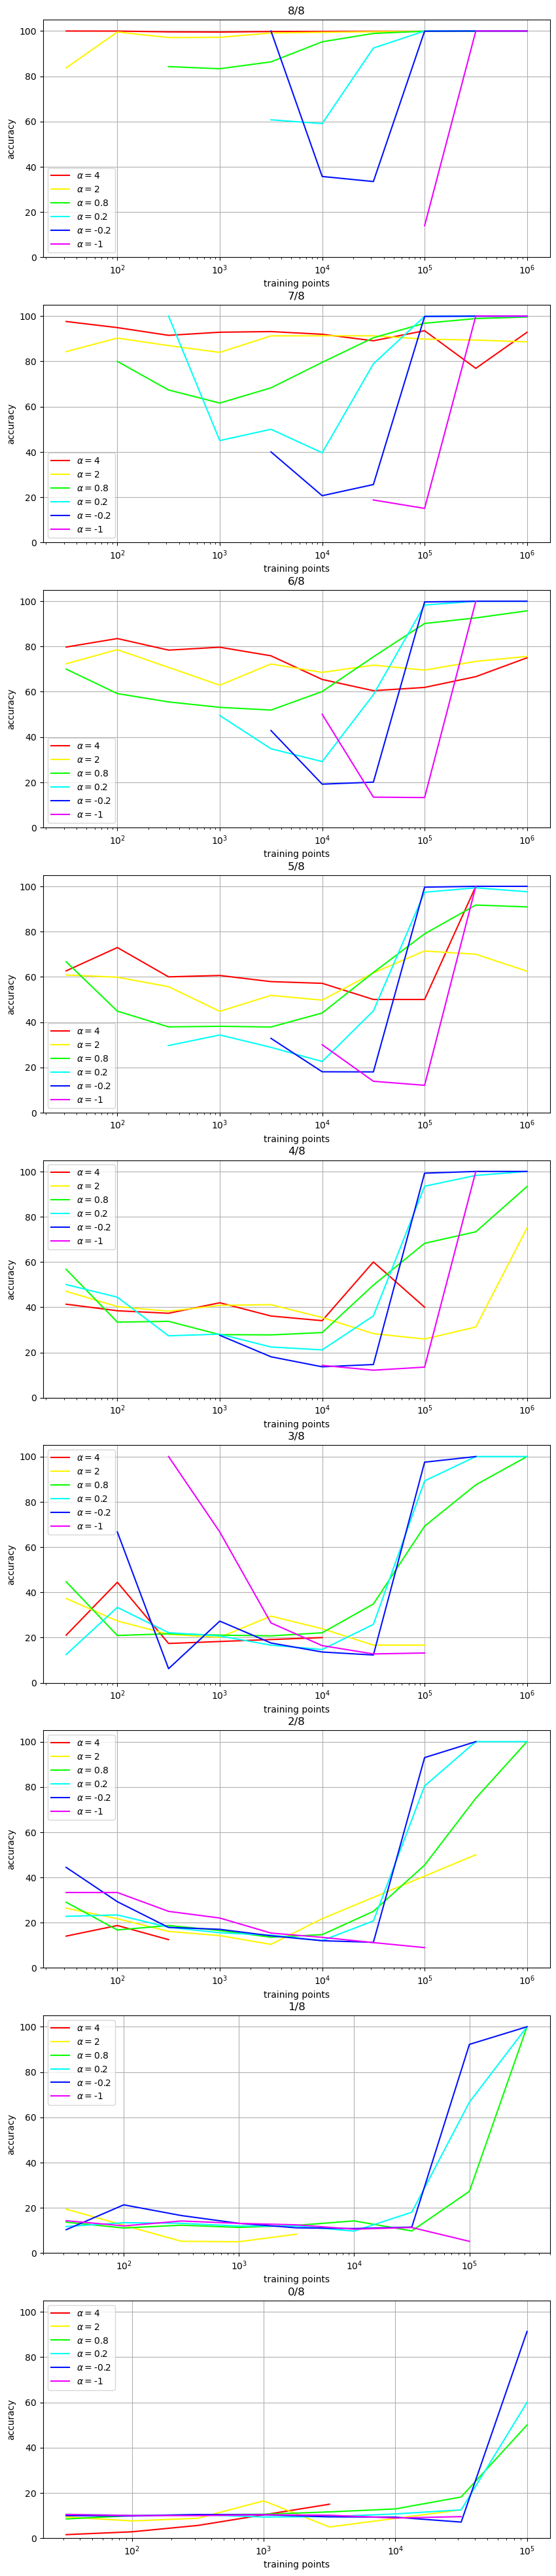

In [8]:
fig, axis = plt.subplots(9, 1, figsize=(10, 50))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["8/8", "7/8", "6/8", "5/8", "4/8", "3/8", "2/8", "1/8", "0/8"]
for i in range(9):  #i is how much path you see
    for j in range(6):  #j is how much temperature you see
        data = m10_v10_L4_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=r"$\alpha=$"+f'{temperature_list[j]}')
    axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


C:\Users\alexk\AppData\Local\Temp\ipykernel_9092\1919047832.py:9: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(m10_v10_L4_s2_trial10_test_size[j, :, i].numpy())


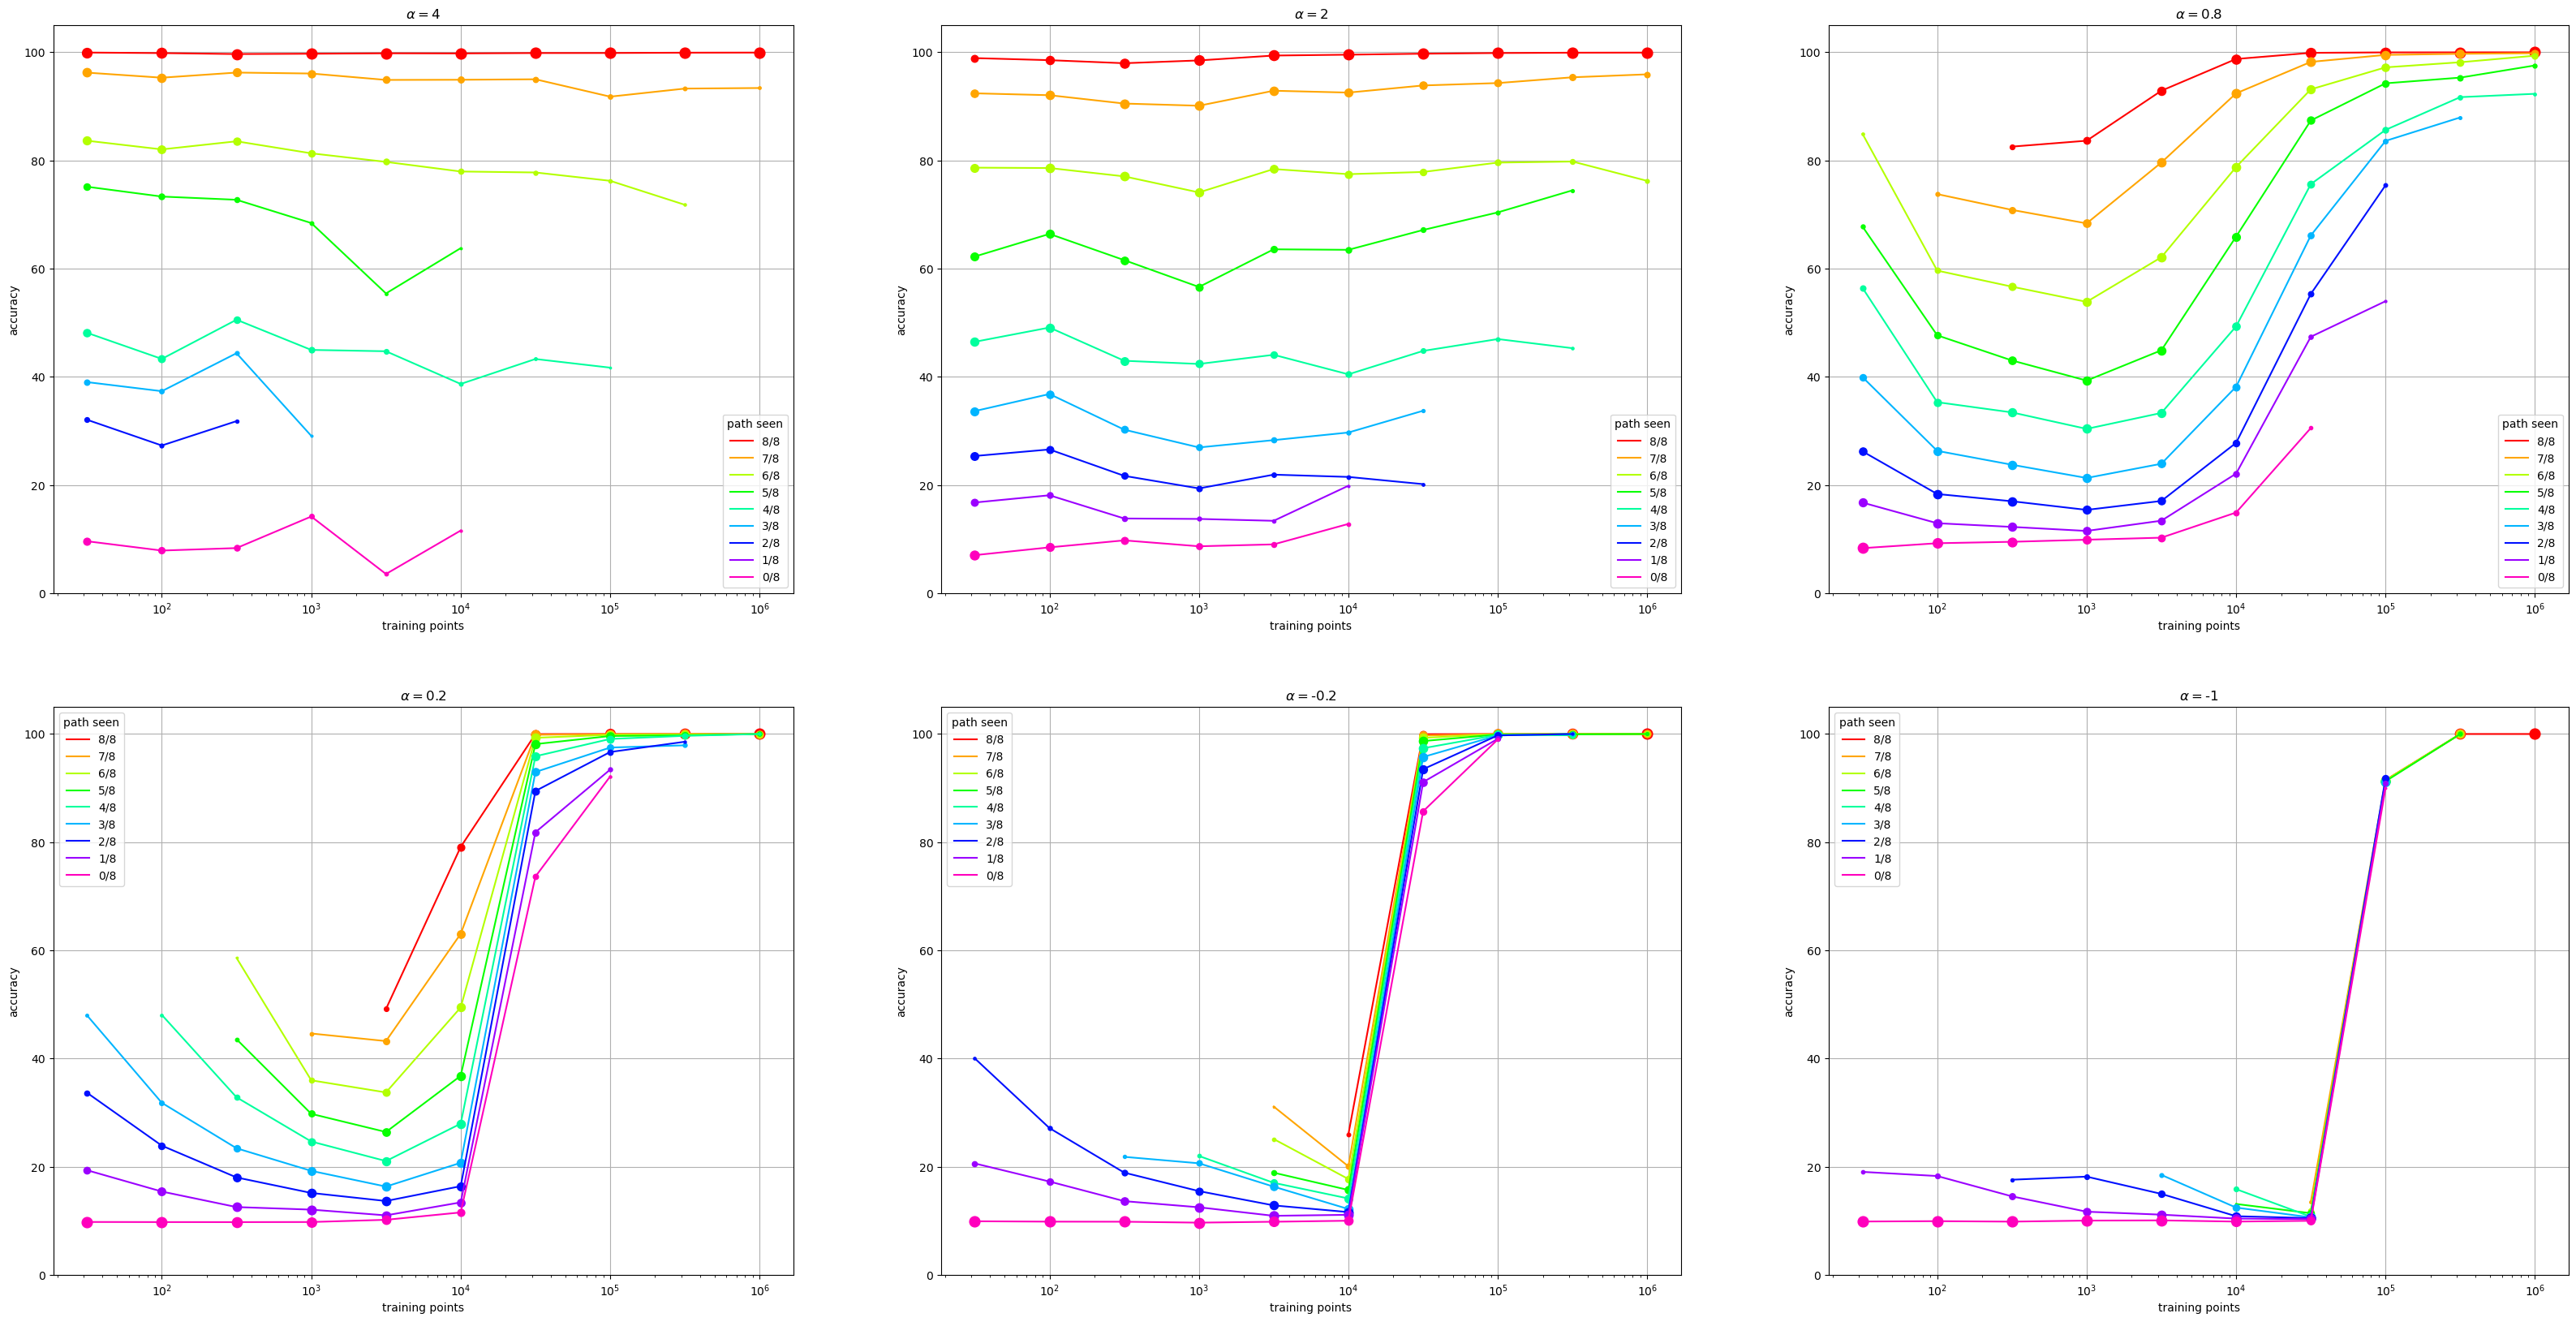

In [16]:
fig, axis = plt.subplots(2, 3, figsize=(40, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
# title_list = ["4/4", "3/4", "2/4", "2/4 in same", "1/4", "0/4"]
title_list = ["8/8", "7/8", "6/8", "5/8", "4/8", "3/8", "2/8", "1/8", "0/8"]
for j in range(6):
    for i in range(9):
        data = m10_v10_L4_s2_trial10[j, :, i].numpy()
        # data = m10_v10_L4_s2[j, :, i].numpy()
        marker_size = np.log(m10_v10_L4_s2_trial10_test_size[j, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(m10_v10_L4_s2_trial10_test_size[j, :, i] > 5)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j//3][j%3].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/9), label=title_list[i])
        for idx in non_zero_indices:
            axis[j//3][j%3].semilogx(ptr_list[idx], data[idx], color=colormap(i/9), markersize=marker_size[idx], marker='o')
    axis[j//3][j%3].set_ylim(0, 105)
    axis[j//3][j%3].set_title(r"$\alpha=$"+f"{temperature_list[j]}")
    axis[j//3][j%3].grid()  
    axis[j//3][j%3].legend(title="path seen")
    axis[j//3][j%3].set_xlabel("training points")
    axis[j//3][j%3].set_ylabel("accuracy")
    marker_sizes = [5, 4, 3, 2, 1]  # Marker sizes
    corresponding_values = [100, 50, 30, 20, 10]
    for size, value in zip(marker_sizes, corresponding_values):
        axis[j//3][j%3].scatter([], [], s=size**2, label=f'{value}', alpha=0.5)  # Marker size is squared for better visibility


    